##  Programmieraufgabe 5

In [4]:
# some setup
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 

## Trigonometrische Interpolation und Schnelle Fourier-Transformation

Gegeben seien eine $2 \pi$-periodische Funktion $f$ und $n$ äquidistante Stützstellen auf $[0,2 \pi)$, d.h.

 \begin{equation}
 (x_0,y_0),\dots,(x_{n-1},y_{n-1})
 \end{equation}
 mit
 \begin{align}
 x_k &= 2 \pi \frac{k}{n} \\
 y_k &= f(x_k) \ ,
 \end{align}
 für $k \in \{0,\dots,n-1\}$.
 
 In der Vorlesung wurde gezeigt, dass das trigonometrische Polynom
 \begin{equation}
 p(x) = \frac{1}{n} \sum^{n-1}_{l=0} \beta_l \, e^{i l x}
 \end{equation}
die Interpolationsaufgabe $p(x_k)=y_k$ genau dann löst, wenn gilt:
\begin{equation}
 \beta_k = \sum^{n-1}_{l=0} y_l \, e^{-i k x_l} = \sum^{n-1}_{l=0} y_l \, e^{-i 2\pi \frac{kl}{n}} =: \bigl(A \, y \bigr)_k
 \end{equation}
Beachten Sie, dass der Normierungsfaktor $\frac{1}{n}$ gegenüber der Vorlesung nach $p(x)$ geschoben wurde, um mit der Konvention von _numpy_ übereinzustimmen.

Den Vektor $\beta$ nennt man auch die _Diskrete Fourier-Transformierte_ des Vektors $y$.


a) Implementieren Sie eine Funktionen, die die Diskrete Fourier-Transformierte eines Vektors berechnet, indem sie die Fourier-Koeffizientenmatrix $A$ aufstellt und anschließend eine Matrix-Vektor-Multiplikation durchführt. Verfahren Sie analog für die inverse DFT.

In [49]:
# a)
def calcDFT(y):
    n = len(y)
    if type(y)==list:
        raise TypeError("vector has to be given in numpy matrix format")
    #print("length of y is",len(y))
    # Die imaginäre Einheit in python ist 'j', die zugehörige Zahlendarstellung 0.+1.j oder kurz 1j
    # 'fromfunction' erzeugt ein Array durch Funktionsauswertung, 'lambda' ist die syntax für eine anonyme Funktion
    
    # Fourier-Matrix
    ### INSERT CODE ###
    Tn_star=np.zeros((n,n),dtype=np.complex_) #create an empty matrix of complex numbers 
    for i in range(n): #fill it with the arguments for the exponential function
        for k in range(n):
            Tn_star[i,k]=-i*k*1.j*2*np.pi/n
        #Tn[k,i]=1.j
    Tn_star=np.exp(Tn_star) #use the exp function on every entry in Matrix
    
    # Matrix-Vektor-Multiplikation
    
    ### INSERT CODE ### 
    #print(Tn_star)
    return np.dot(Tn_star,y) #return the matrix multiplication of 


def calcInvDFT(betta):
    n = len(betta)
    if type(betta)==list:
        raise TypeError("vector has to be given in numpy matrix format")
    # inverse Fourier-Matrix
    ### INSERT CODE ###
    Tn=np.zeros((n,n),dtype=np.complex_) #create an empty matrix of complex numbers 
    for i in range(n): #fill it with the arguments for the exponential function
        for k in range(n):
            Tn[i,k]=i*k*1.j*2*np.pi/n
        #Tn[k,i]=1.j
    Tn=np.exp(Tn) #use the exp function on every entry in Matrix
    
    # inverse Fourier-Matrix
    ### INSERT CODE ###
    
    # Matrix-Vektor-Multiplikation
    ### INSERT CODE ###
    return np.dot(Tn,betta)

#testing data
#y=np.matrix('1;2;3;4')
#betta=calcDFT(y)
#print(betta)
#betta=(1/4)*betta
#print(calcInvDFT(betta))

b) Implementieren Sie (von Hand) die in der Vorlesung gezeigte _Schnelle Fourier-Transformation (FFT)_ nach _Cooley und Tukey_ in eine Funktion, die als Eingabe einen Vektor $y$ nimmt, und dessen Diskrete Fourier-Transformierte zurückgibt. Erstellen Sie eine zweite Funktion, die die inverse Transformation übernimmt. Beachten Sie, dass die Länge $n$ des Eingangsvektors eine Zweierpotenz sein muss.

In [50]:
# b)
def calcFFT(y):
    # Rekursiver FFT-Algorithmus
    n = len(y)
    if n==1:
        return y
    else:
        # Prüft in jeder Instanz, ob n (noch) gerade ist
        ### INSERT CODE ###
        if n%2!=0: #check if n is multiple of 2
            raise ValueError("Length of given vector has to be 2^m")
        
        
        # Auftrennen in gerade und ungerade Indizes
        # y[a:b:s] bedeutet Index-Range von a bis b-1 in Schrittweite s, [::] ist kurz für [Anfang:Ende:1]
        ### INSERT CODE ###
        y_even=calcFFT(y[::2]) #split list to calculate recursive
        y_odd=calcFFT(y[1::2])
        
        # Zusammenfügen der Teilergebnisse (durch numpy's broadcasting spart man sich for-Schleifen)
        ### INSERT CODE ###
        
        
        Omega=np.zeros(n//2, dtype=np.complex_) #create omega vector from lecture
        for k in range(n//2):
            Omega[k]=np.exp(-2*(np.pi)*1.j*k/n)
        
        #compute c[i] for all i
        c1=Omega*y_odd
        c1=y_even+c1
        
        c2=Omega*y_odd
        c2=y_even-c2
        
        #concantenate them to one vector
        c=np.concatenate((c1,c2))
        
        
        return c
    
def calcInvFFT(y):
    n = len(y)
    if n==1:
        return y
    else:
        ### INSERT CODE ###
        
        # Prüft in jeder Instanz, ob n (noch) gerade ist
        ### INSERT CODE ###
        if n%2!=0: #check if n is multiple of 2
            raise ValueError("Length of given vector has to be 2^m")
        
        
        # Auftrennen in gerade und ungerade Indizes
        # y[a:b:s] bedeutet Index-Range von a bis b-1 in Schrittweite s, [::] ist kurz für [Anfang:Ende:1]
        ### INSERT CODE ###
        y_even=calcFFT(y[::2]) #split list to calculate recursive
        y_odd=calcFFT(y[1::2])
        
        # Zusammenfügen der Teilergebnisse (durch numpy's broadcasting spart man sich for-Schleifen)
        ### INSERT CODE ##
        
        
        Omega=np.zeros(n//2, dtype=np.complex_)
        for k in range(n//2):
            Omega[k]=np.exp(2*(np.pi)*1.j*k/n)
        
        c1=Omega*y_odd
        c1=y_even+c1
        
        c2=Omega*y_odd
        c2=y_even-c2
        
        c=np.concatenate((c1,c2))
        
        
        return c # Normierung! #original war normierum c/2 was auch immer das sollte
    
#testdaten
#y=np.array([1,2,3,4])
#betta=calcFFT(y)
#print(betta)
#betta=(1/4)*betta
#print(calcInvFFT(betta))

c) Machen Sie sich mit dem Modul _numpy.fft_ vertraut, insbesondere mit den Routinen _fft_ und _ifft_.

d) Betrachten Sie nun die Funktion $f(t) = \cos(10 t) + \cos(5 t)$. Erstellen Sie ein Array $y_k = f(x_k)$ für $n=16$ und wenden Sie mit jeder der Methoden aus Teilaufgabe a)-c) die Diskrete Fourier Transformation an.
Gilt jeweils $\text{iDFT}(\text{DFT}(y)) = y$ ?  
Vergleichen Sie die Methoden untereinander. Erhalten Sie jeweils das gleiche Ergebnis oder gibt es numerische Abweichungen? Ermitteln Sie den Laufzeit-Unterschied für verschiedene (große) $n$ mittels _%timeit_ .

In [52]:
# d)

n = 16

# Erzeuge Stützstellen (z.B. np.linspace)
### INSERT CODE ###
x=np.linspace(0.0,2*np.pi,n)

#create function values
y1=np.cos(10*x)
y2=np.cos(5*x)

y=y1+y2

#plt.plot(x,y)
#plt.show()

# Gib die DFT aus und prüfe die Inverse
print('Naive Lösung:')
### INSERT CODE ###
B1=calcDFT(y)
print(B1)

print('Eigene FFT:')
### INSERT CODE ###
B2=calcFFT(y)
print(B2)

print('Numpy FFT:')
### INSERT CODE ###
B3=np.fft.fft(y)
print(B3)

# Vergleiche calcFFT und np.fft.fft:
print('FFT = FFT?')
Diff=B2-B3

#maximum of difference
print("max difference of python FFT and own FFT is")
print(np.max(Diff))

Naive Lösung:
[ 2.00000000e+00+0.00000000e+00j  2.02672995e+00+4.03141653e-01j
  2.12132034e+00+8.78679656e-01j  2.34968175e+00+1.57000715e+00j
  3.00000000e+00+3.00000000e+00j  7.89295894e+00+1.18126478e+01j
 -2.12132034e+00-5.12132034e+00j -2.69370641e-01-1.35421766e+00j
  2.88657986e-15-9.43225628e-15j -2.69370641e-01+1.35421766e+00j
 -2.12132034e+00+5.12132034e+00j  7.89295894e+00-1.18126478e+01j
  3.00000000e+00-3.00000000e+00j  2.34968175e+00-1.57000715e+00j
  2.12132034e+00-8.78679656e-01j  2.02672995e+00-4.03141653e-01j]
Eigene FFT:
[ 2.00000000e+00 +0.        j  2.02672995e+00 +0.40314165j
  2.12132034e+00 +0.87867966j  2.34968175e+00 +1.57000715j
  3.00000000e+00 +3.        j  7.89295894e+00+11.81264784j
 -2.12132034e+00 -5.12132034j -2.69370641e-01 -1.35421766j
  3.10862447e-15 +0.        j -2.69370641e-01 +1.35421766j
 -2.12132034e+00 +5.12132034j  7.89295894e+00-11.81264784j
  3.00000000e+00 -3.        j  2.34968175e+00 -1.57000715j
  2.12132034e+00 -0.87867966j  2.0267299

In [48]:
# immernoch d)
n=2048

# Erzeuge Stützstellen
### COPY CODE FROM ABOVE ###
x=np.linspace(0.0,2*np.pi,n)

#create function values
y1=np.cos(10*x)
y2=np.cos(5*x)

y=y1+y2

# Prüfe Laufzeit (siehe %timeit in der ipython Dokumentation)
print("Zeit für naive DFT:")
%timeit calcDFT(y)

print("Zeit für eigene FFT:")
%timeit calcFFT(y)
print("Zeit für numpy FFT:")
### INSERT CODE ###
%timeit np.fft.fft(y)

Zeit für naive DFT:
2.39 s ± 90.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Zeit für eigene FFT:
34.4 ms ± 4.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Zeit für numpy FFT:
47.5 µs ± 4.29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


e ) Konstruieren Sie aus den $\beta_k$ die Koeffizienten $a_k,b_k$ der reellen Darstellung $q(t)$ des Interpolationspolynoms, siehe dazu S. 169 f. des [alternativen Vorlsungsskripts](http://www.ins.uni-bonn.de/teaching/vorlesungen/AlMaWS13/script.pdf) (beschränken Sie sich auf den Fall gerader $n$). Plotten Sie schließlich die Funktion $f(t)$ sowie das resultierende Interpolationspolynom $q(t)$ für verschiedene $n$ auf ganz $[0,2 \pi)$. Was fällt Ihnen auf? Wie sieht es aus für z.B. $g(t) = 2\, \, \bigl| \frac{t}{\pi}-1\,\bigr| -1 $?

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


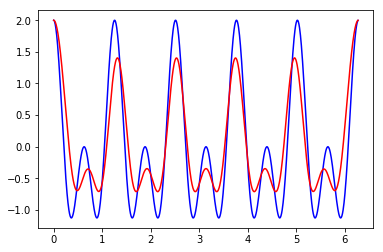

In [47]:
# e)
n = 32

# Funktion f
f = lambda t: np.cos(10*t)+np.cos(5*t)
# Alternative Funktion
#f = lambda t:

# berechne FFT (mit n sampling points)
### INSERT CODE ###
x=np.linspace(0.0,2*np.pi,n)
y=np.array([f(t) for t in x])

betta =1/n*np.fft.fft(y)



m = int(n/2)
# Berechne a_k und b_k
### INSERT CODE ###
a=np.zeros(m, dtype=np.complex_)
b=np.zeros(m,dtype=np.complex_)

a[0]=2*betta[0]
for l in range(1,m):
    a[l]=betta[l]+betta[n-l]
    b[l]=1.j*(betta[l]+betta[n-l])

# konstruiere Interpolationspolynom
#q = lambda t: 
def q(t):
### INSERT CODE ###
    cs=np.cos(t*np.arange(float(m))) #fill with cos(l*t)
    sn=np.sin(t*np.arange(float(m))) #fill with sin(l*t)
    cs=a*cs #multiply with DFT coefficients
    sn=b*sn
    cs[0]=0
    sn[0]=0
    
    return np.sum(cs)+np.sum(sn)+a[0]/2+2*betta[m]/2*np.cos(m*t)
    
    

# vorhergehende Funktion lässt sich nicht ohne weiteres auf ein numpy-array broadcasten. Erzeuge eine Universal-function:
Uq = np.frompyfunc(q,1,1)



#konstruiere hochaufgelöstes Gitter für pyplot (mit N sampling points)
N = 1000
r = np.linspace(0,2*np.pi,N,endpoint=False)
# Werte f und q auf diesem Gitter aus
yf = f(r)
yq = Uq(r)

# Plotte Funktion und Interpolierende mit pyplot
plt.plot( r, yf, '-b')
plt.plot( r, yq, '-r')
plt.show()

f) Fügen Sie den Daten der Funktion $f$ für $n=1024$ Rauschen hinzu, mittels
\begin{equation}
\bar{y}_k = y_k + X_k \ , \quad X_k \sim U(-\delta,\delta) \, .
\end{equation}
Berechnen Sie die Fourier-Transformierte und filtern Sie das Rauschen heraus, indem Sie alle Einträge mit $|\bar{\beta}_k| < \epsilon \cdot n$ für ein $\epsilon>0$ auf Null setzen. Führen Sie anschließend die Rücktransformation durch.
Plotten Sie die verrauschten sowie die bereinigten Daten für verschiedene $\delta$ und $\epsilon$.

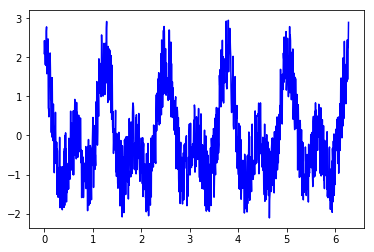

C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


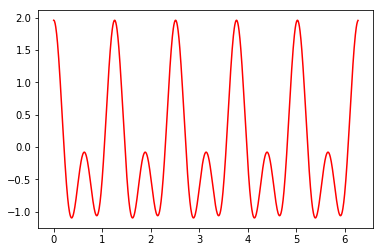

In [55]:
# f)
#parameter
delta = 1
epsilon = 0.2

np.random.seed(0)

# konstruiere hochaufgelöstes Gitter
n = 1024
r = np.linspace(0,2*np.pi,n,endpoint=False)

# Funktion f
### COPY CODE FROM ABOVE ###
f = lambda t: np.cos(10*t)+np.cos(5*t)

# konstruiere verrauschtes Signal
### INSERT CODE ###
yf = np.array([f(t)+np.random.uniform(-delta,delta) for t in r])

# konstruiere entrauschtes Signal
### INSERT CODE ###
betta=1/n*betta
betta=np.fft.fft(yf)
for k in range(len(betta)):
    if np.absolute(betta[k])<epsilon*n:
        betta[k]=0


yfC = np.fft.ifft(betta)


# Plotte beide Signale
plt.plot( r, yf, '-b')
plt.show()
plt.plot( r, yfC, '-r')
plt.show()